In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('../datasets/pib_per_capita/GDP.csv')

In [3]:
#mostra o dataframe
df

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [4]:
# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)

In [5]:
# Padronizar e limpar os nomes das colunas
df.columns = df.columns.str.strip()  # Remover espaços extras no início e no fim
df.columns = df.columns.str.lower()  # Converter para minúsculas
df.columns = df.columns.str.replace(' ', '_')  # Substituir espaços por sublinhados
df.columns = df.columns.str.replace(r'[^\w\s]', '')  # Remover caracteres especiais, mantendo letras, números e espaços

In [6]:
# Transformando tabela anos em datatime
df['year'] = pd.to_datetime(df['year'], errors='coerce')
# Formatando para aparecer somente os anos
df['year'] = df['year'].dt.year.astype('int64')
# Substituindo valores de 0 para NaN na coluna do pib

df

,country,region,year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [7]:
# Limpar os valores na coluna 'gdp_pp' e converter para float
df['gdp_pp'] = df['gdp_pp'].str.strip().str.replace(',', '').astype(float)

In [8]:
# Substituir os valores zerados na coluna 'gdp_pp' por NaN
df['gdp_pp'] = df['gdp_pp'].replace(0, pd.NA)

In [9]:
def fill_years(group):
    # Criar um range completo de anos
    full_years = pd.DataFrame({'year': range(group['year'].min(), group['year'].max() + 1)})
    # Merge com o grupo original para garantir todos os anos
    group = full_years.merge(group, on='year', how='left')
    # Preencher os valores de 'Paises' e 'Regiao'
    group['country'] = group['country'].ffill()
    group['region'] = group['region'].ffill()
    return group

# Aplicar o preenchimento para cada grupo de país e região
df = df.groupby(['country', 'region'], group_keys=False).apply(fill_years)




In [10]:
# Interpolando os valores ausentes
df['gdp_pp'] = round(df['gdp_pp'].interpolate(), 2)

In [11]:
# Ordenar os dados por região e ano
df = df.sort_values(by=['region', 'year'])

df

,year,country,region,gdp_pp
0,1901,Bangladesh,Asia,690.52
0,1901,Bhutan,Asia,625.21
0,1901,Brunei,Asia,1315.52
0,1901,Cambodia,Asia,723.53
0,1901,China,Asia,803.06
...,...,...,...,...
110,2011,Tanzania,Sub-Saharan Africa,1269.58
110,2011,Togo,Sub-Saharan Africa,949.34
110,2011,Uganda,Sub-Saharan Africa,1260.03
110,2011,Zambia,Sub-Saharan Africa,1480.69


In [12]:
# Calculando a média do PIB per capita por região
region_avg_gdp = df.groupby('region')['gdp_pp'].mean()

In [13]:
region_avg_gdp

region
Asia                                              3747.932149
Australia and Oceania                             4548.101903
Central America and the Caribbean                 4224.481361
Europe                                            9910.714232
Middle East, North Africa, and Greater Arabia     7403.491054
North America                                    13789.415608
South America                                     4308.555638
Sub-Saharan Africa                                1535.748018
Name: gdp_pp, dtype: float64

In [14]:

# Arredondar para dois caracteres após o ponto decimal
df['gdp_per_capita_growth'] = df['gdp_pp'].round(2)


In [15]:
# Multiplicar por 100 para converter em porcentagem
df['gdp_per_capita_growth'] *= 100


In [16]:
# Calcular o crescimento acumulado total para cada região no período analisado
region_growth = df.groupby('region')['gdp_per_capita_growth'].last().sort_values(ascending=False)

In [17]:
# Selecionar as três regiões que mais cresceram
top_regions = region_growth.head(3).index
top_regions

Index(['North America', 'Europe', 'Central America and the Caribbean'], dtype='object', name='region')

In [18]:
# Filtrar o DataFrame para conter apenas essas três regiões
df_top_regions = df[df['region'].isin(top_regions)]

In [19]:
# Calculando a média do PIB per capita por região e limitando para duas casas decimais
region_avg_gdp = df.groupby('region')['gdp_pp'].mean().round(2)

In [20]:
region_avg_gdp


region
Asia                                              3747.93
Australia and Oceania                             4548.10
Central America and the Caribbean                 4224.48
Europe                                            9910.71
Middle East, North Africa, and Greater Arabia     7403.49
North America                                    13789.42
South America                                     4308.56
Sub-Saharan Africa                                1535.75
Name: gdp_pp, dtype: float64

In [21]:
df

,year,country,region,gdp_pp,gdp_per_capita_growth
0,1901,Bangladesh,Asia,690.52,69052.0
0,1901,Bhutan,Asia,625.21,62521.0
0,1901,Brunei,Asia,1315.52,131552.0
0,1901,Cambodia,Asia,723.53,72353.0
0,1901,China,Asia,803.06,80306.0
...,...,...,...,...,...
110,2011,Tanzania,Sub-Saharan Africa,1269.58,126958.0
110,2011,Togo,Sub-Saharan Africa,949.34,94934.0
110,2011,Uganda,Sub-Saharan Africa,1260.03,126003.0
110,2011,Zambia,Sub-Saharan Africa,1480.69,148069.0


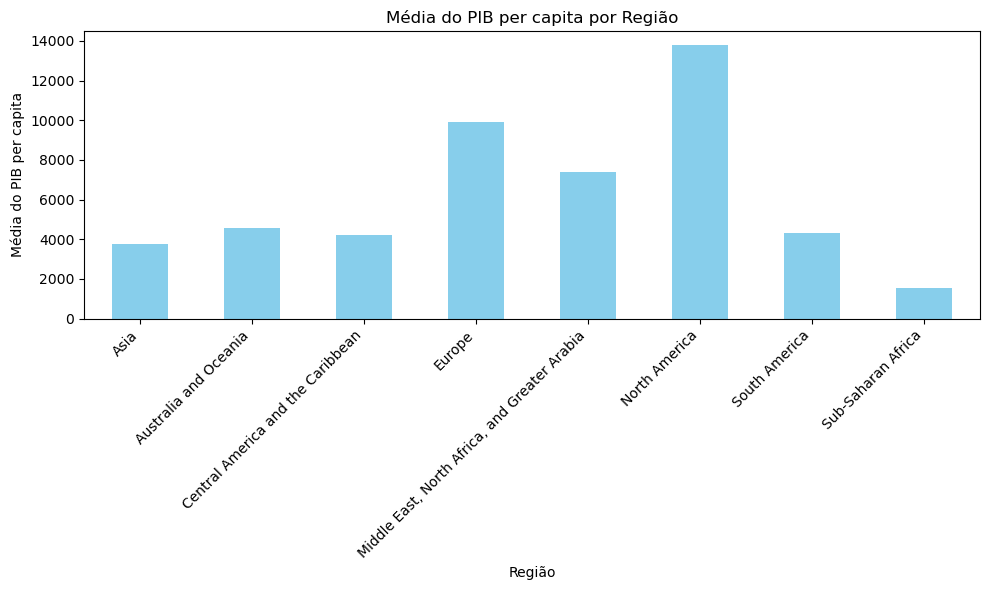

In [22]:
plt.figure(figsize=(10, 6))
region_avg_gdp.plot(kind='bar', color='skyblue')
plt.title('Média do PIB per capita por Região')
plt.xlabel('Região')
plt.ylabel('Média do PIB per capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
df_obesity = pd.read_csv('../datasets/obesidade/obesity-cleaned.csv')

In [24]:
#mostra o dataframe
print(df_obesity)

       Unnamed: 0      Country  Year       Obesity (%)         Sex
0               0  Afghanistan  1975     0.5 [0.2-1.1]  Both sexes
1               1  Afghanistan  1975     0.2 [0.0-0.6]        Male
2               2  Afghanistan  1975     0.8 [0.2-2.0]      Female
3               3  Afghanistan  1976     0.5 [0.2-1.1]  Both sexes
4               4  Afghanistan  1976     0.2 [0.0-0.7]        Male
...           ...          ...   ...               ...         ...
24565       24565     Zimbabwe  2015     4.5 [2.4-7.6]        Male
24566       24566     Zimbabwe  2015  24.8 [18.9-31.3]      Female
24567       24567     Zimbabwe  2016  15.5 [12.0-19.2]  Both sexes
24568       24568     Zimbabwe  2016     4.7 [2.5-8.0]        Male
24569       24569     Zimbabwe  2016  25.3 [19.1-32.0]      Female

[24570 rows x 5 columns]


In [25]:
# Tratar os nomes das colunas do DataFrame de obesidade
df_obesity = df_obesity.drop(columns=['Unnamed: 0'])  # Remover a coluna 'Unnamed: 0'
df_obesity.columns = df_obesity.columns.str.strip()  # Remover espaços nos nomes das colunas

In [26]:
print(df_obesity)

           Country  Year       Obesity (%)         Sex
0      Afghanistan  1975     0.5 [0.2-1.1]  Both sexes
1      Afghanistan  1975     0.2 [0.0-0.6]        Male
2      Afghanistan  1975     0.8 [0.2-2.0]      Female
3      Afghanistan  1976     0.5 [0.2-1.1]  Both sexes
4      Afghanistan  1976     0.2 [0.0-0.7]        Male
...            ...   ...               ...         ...
24565     Zimbabwe  2015     4.5 [2.4-7.6]        Male
24566     Zimbabwe  2015  24.8 [18.9-31.3]      Female
24567     Zimbabwe  2016  15.5 [12.0-19.2]  Both sexes
24568     Zimbabwe  2016     4.7 [2.5-8.0]        Male
24569     Zimbabwe  2016  25.3 [19.1-32.0]      Female

[24570 rows x 4 columns]


In [27]:
# Remover todos os caracteres depois do espaço na coluna 'Obesity (%)'
df_obesity['Obesity (%)'] = df_obesity['Obesity (%)'].str.split().str[0]

In [28]:
# Converter a coluna 'Obesity (%)' para float, ignorando os erros
df_obesity['Obesity (%)'] = pd.to_numeric(df_obesity['Obesity (%)'], errors='coerce')

In [29]:
print(df_obesity)

           Country  Year  Obesity (%)         Sex
0      Afghanistan  1975          0.5  Both sexes
1      Afghanistan  1975          0.2        Male
2      Afghanistan  1975          0.8      Female
3      Afghanistan  1976          0.5  Both sexes
4      Afghanistan  1976          0.2        Male
...            ...   ...          ...         ...
24565     Zimbabwe  2015          4.5        Male
24566     Zimbabwe  2015         24.8      Female
24567     Zimbabwe  2016         15.5  Both sexes
24568     Zimbabwe  2016          4.7        Male
24569     Zimbabwe  2016         25.3      Female

[24570 rows x 4 columns]


In [30]:
# Incluir a coluna "region" no DataFrame de obesidade
df_obesity = df_obesity.merge(df[['country', 'region']], left_on='Country', right_on='country', how='left')
df_obesity = df_obesity.drop(columns=['country'])  # Remover a coluna duplicada 'country'
df_obesity


In [31]:
df_obesity

,Country,Year,Obesity (%),Sex,region
0,Afghanistan,1975,0.5,Both sexes,"Middle East, North Africa, and Greater Arabia"
1,Afghanistan,1975,0.5,Both sexes,"Middle East, North Africa, and Greater Arabia"
2,Afghanistan,1975,0.5,Both sexes,"Middle East, North Africa, and Greater Arabia"
3,Afghanistan,1975,0.5,Both sexes,"Middle East, North Africa, and Greater Arabia"
4,Afghanistan,1975,0.5,Both sexes,"Middle East, North Africa, and Greater Arabia"
...,...,...,...,...,...
2324065,Zimbabwe,2016,25.3,Female,Sub-Saharan Africa
2324066,Zimbabwe,2016,25.3,Female,Sub-Saharan Africa
2324067,Zimbabwe,2016,25.3,Female,Sub-Saharan Africa
2324068,Zimbabwe,2016,25.3,Female,Sub-Saharan Africa


In [32]:
# Calcular a média de obesidade para cada região
region_avg_obesity = df_obesity.groupby('region')['Obesity (%)'].mean().reset_index()

In [37]:
# Unir os DataFrames de média de PIB e média de obesidade por região
region_avg = pd.merge(region_avg_gdp, region_avg_obesity, on='region')
region_avg


,region,gdp_pp,Obesity (%)
0,Asia,3747.93,4.747543
1,Australia and Oceania,4548.10,26.114702
2,Central America and the Caribbean,4224.48,13.471596
3,Europe,9910.71,15.151351
4,"Middle East, North Africa, and Greater Arabia",7403.49,17.818452
5,North America,13789.42,18.575794
6,South America,4308.56,14.659683
7,Sub-Saharan Africa,1535.75,4.857814


In [38]:
# Calcular a correlação entre a média de renda per capita e a média de obesidade por região
correlation = region_avg[['gdp_pp', 'Obesity (%)']].corr().iloc[0, 1]
correlation


0.44943826663351366

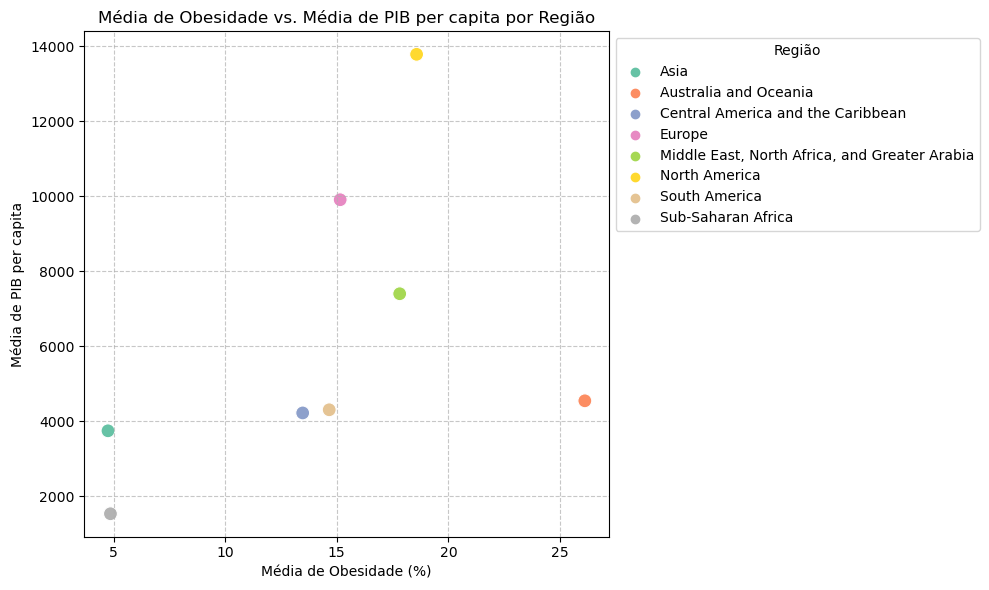

In [35]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=region_avg, x='Obesity (%)', y='gdp_pp', hue='region', palette='Set2', s=100)
plt.title('Média de Obesidade vs. Média de PIB per capita por Região')
plt.xlabel('Média de Obesidade (%)')
plt.ylabel('Média de PIB per capita')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Região', bbox_to_anchor=(1, 1), loc='upper left')  # Move a legenda para a parte inferior do gráfico
plt.tight_layout()
plt.show()

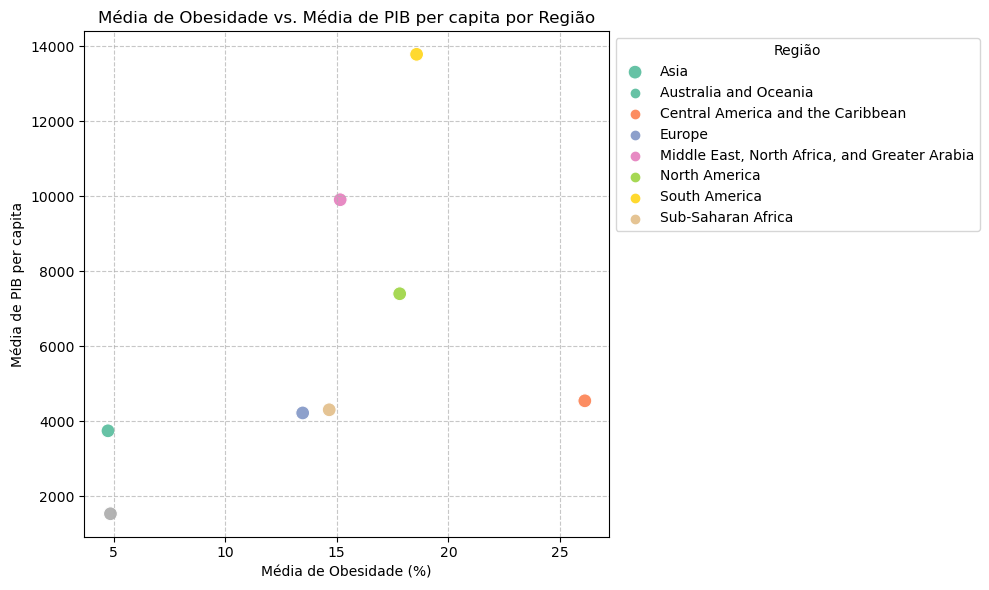

In [36]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=region_avg, x='Obesity (%)', y='gdp_pp', hue='region', palette='Set2', s=100)
plt.title('Média de Obesidade vs. Média de PIB per capita por Região')
plt.xlabel('Média de Obesidade (%)')
plt.ylabel('Média de PIB per capita')
plt.grid(True, linestyle='--', alpha=0.7)

# Mover a legenda para a parte inferior do gráfico e ordenar
plt.legend(title='Região', bbox_to_anchor=(1, 1), loc='upper left', labels=region_avg['region'].tolist())  

plt.tight_layout()
plt.show()